### Customer Churn Dataset

Get the dataset at Kaggle: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data <br>
The subsequent code to create the dataset is heavily inspired by this notebook: https://www.kaggle.com/code/naufaldhiyaulhaq/churn-probability-prediction

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('./data/olist_customers_dataset.csv')
items = pd.read_csv('./data/olist_order_items_dataset.csv')
payments = pd.read_csv('./data/olist_order_payments_dataset.csv')
reviews = pd.read_csv('./data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('./data/olist_orders_dataset.csv')
products = pd.read_csv('./data/olist_products_dataset.csv')
prod_catg = pd.read_csv('./data/product_category_name_translation.csv')

In [3]:
ids = list(customers["customer_unique_id"].values)
zips = list([str(x)[:2] for x in customers["customer_zip_code_prefix"].values])
states = list(customers["customer_state"].values)

customer_zip_dict = {}
customer_state_dict = {}
for i, id in enumerate(ids):
    customer_zip_dict[id] = zips[i]
    customer_state_dict[id] = states[i]

In [4]:
df = customers.merge(right = orders, how = 'left', on = 'customer_id')
df = df.merge(right = payments, on = 'order_id')
df = df.merge(right = items, on = 'order_id')
df = df.merge(right = products, on = 'product_id')
df = df.merge(right = reviews, on = 'order_id')
df = df.merge(right = prod_catg, on = 'product_category_name')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,54.0,64.0,31.0,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,54.0,64.0,31.0,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,office_furniture


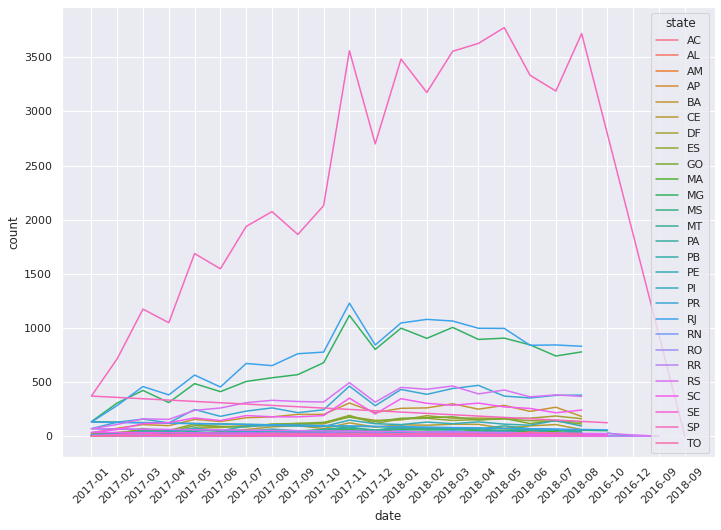

In [5]:
df["order_date"] = ["-".join(str(x).split("-")[0:2]) for x in df["order_purchase_timestamp"].values]
tmp = df.groupby(['customer_state', 'order_date']).size().reset_index()
tmp.columns = ["state", "date", "count"]
tmp.head()
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.lineplot(data=tmp, x="date", y="count", hue="state", sort=False)
plt.xticks(rotation=45)
plt.show()

In [6]:
df = df.sort_values(by = 'order_item_id', ascending = False).drop_duplicates('order_id')
df.drop(['customer_city', 'order_status', 'seller_id', 'product_name_lenght', 
         'product_category_name', 'product_description_lenght', "customer_state", 'product_length_cm', 'product_height_cm', 'product_width_cm', 
         'product_photos_qty', 'review_creation_date', 'review_answer_timestamp', 'review_comment_message', "order_date"
        ], axis = 1, inplace = True)

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

#Make column that represent timestamp based on months and day of week
df['purchase_timestamp_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_timestamp_dow'] = df['order_purchase_timestamp'].dt.dayofweek

#Make column that represent timestamp based on hours
df['purchase_timestamp_hour'] = df['order_purchase_timestamp'].dt.hour

#classify hour column to part of day (morning, afternoon, evening, night)
def partofday(x):
    if (x >= 5) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 17):
        return 'afternoon'
    elif (x >= 17) & (x < 21):
        return 'evening'
    else:
        return 'night'
df['purchase_timestamp_pod'] = df['purchase_timestamp_hour'].apply(partofday)

In [7]:
df['total_price'] = df['order_item_id'] * df['price']

#Total freight value
df['total_freight_value'] = df['order_item_id'] * df['price']

#Total order value (total price + total freight)
df['total_order_value'] = df['total_price'] + df['total_freight_value']

In [8]:
df.drop(['customer_zip_code_prefix'], axis = 1, inplace = True)

In [ ]:
new_df = df.groupby('customer_unique_id').agg(
    total_order=pd.NamedAgg(column='order_id', aggfunc='count'),
    first_purchase_date=pd.NamedAgg(column='order_purchase_timestamp', aggfunc='min'),
    last_purchase_date=pd.NamedAgg(column='order_purchase_timestamp', aggfunc='max'),
    avg_item_ordered=pd.NamedAgg(column='order_item_id', aggfunc='mean'),
    avg_product_weight=pd.NamedAgg(column='product_weight_g', aggfunc='mean'),
    average_order_value=pd.NamedAgg(column='total_order_value', aggfunc='mean'),
    average_score=pd.NamedAgg(column='review_score', aggfunc='mean'),
    total_order_in_review=pd.NamedAgg(column='review_comment_title', aggfunc='count')
    ).reset_index()
new_df.head()

In [11]:
new_df['delta_last_first'] = (new_df['last_purchase_date'] - new_df['first_purchase_date']).dt.days

#the average day each customer makes an order
new_df['avg_days_per_order'] = new_df['delta_last_first'] / new_df['total_order']

#customer order recency
new_df['recency_by_day'] = (new_df['last_purchase_date'].max() - new_df['last_purchase_date']).dt.days

#review-transaction ratio
new_df['rev_transaction_ratio'] = new_df['total_order_in_review'] / new_df['total_order']

In [13]:
#The most frequent day customers place orders
day_buy = df.groupby(['customer_unique_id'])['purchase_timestamp_dow'].max(df['purchase_timestamp_dow'].count()).reset_index()
day_buy = pd.DataFrame(data = day_buy).rename(columns = {'purchase_timestamp_dow' : 'modus_dow_buy'})

#The most frequent month customers place orders
month_buy = df.groupby(['customer_unique_id'])['purchase_timestamp_month'].max(df['purchase_timestamp_month'].count()).reset_index()
month_buy = pd.DataFrame(data = month_buy).rename(columns = {'purchase_timestamp_month' : 'modus_month_buy'})

#The most frequent time of day customers place orders
partofday_buy = df.groupby(['customer_unique_id'])['purchase_timestamp_hour'].max(df['purchase_timestamp_hour'].count())
partofday_buy = pd.DataFrame(data = partofday_buy).reset_index()
def partofday(x):
    if (x >= 5) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 17):
        return 'afternoon'
    elif (x >= 17) & (x < 21):
        return 'evening'
    else:
        return 'night'
partofday_buy['purchase_timestamp_hour'] = partofday_buy['purchase_timestamp_hour'].apply(partofday)
partofday_buy.rename(columns = {'purchase_timestamp_hour' : 'modus_partofday_buy'}, inplace=True)

#customer payment method preferences
top_payment_type = df.groupby(['customer_unique_id'])['payment_type'].max(df['payment_type'].value_counts().argmax()).reset_index()
top_payment_type = pd.DataFrame(data = top_payment_type).rename(columns = {'payment_type':'preferred_payment_type'}).sort_values(by = 'preferred_payment_type', ascending = False)

#how much categories customer buy from
multi_prod_cat = df.groupby(['customer_unique_id'])['product_category_name_english'].nunique()
multi_prod_cat = pd.DataFrame(data = multi_prod_cat).rename(columns = {'product_category_name_english' : 'number_product_purchase_category'}).reset_index()

In [14]:
almostfinal_df = pd.merge(left = day_buy, right = month_buy, how = 'left', on = 'customer_unique_id')
almostfinal_df = almostfinal_df.merge(right = partofday_buy, how = 'left', on = 'customer_unique_id')
almostfinal_df = almostfinal_df.merge(right = top_payment_type, how = 'left', on = 'customer_unique_id')
almostfinal_df = almostfinal_df.merge(right = multi_prod_cat, how = 'left', on = 'customer_unique_id')

In [15]:
new_df = new_df.merge(right = almostfinal_df, how = 'left', on = 'customer_unique_id')

In [16]:
new_df.drop(['first_purchase_date', 'last_purchase_date'
        ], axis = 1, inplace = True)

In [17]:
new_df.head()

,customer_unique_id,total_order,avg_item_ordered,avg_product_weight,average_order_value,average_score,total_order_in_review,delta_last_first,avg_days_per_order,recency_by_day,rev_transaction_ratio,modus_dow_buy,modus_month_buy,modus_partofday_buy,preferred_payment_type,number_product_purchase_category
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,1500.0,259.80,5.0,1,0,0.0,115,1.0,3,5,morning,credit_card,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,375.0,37.80,4.0,0,0,0.0,118,0.0,0,5,morning,credit_card,1
2,0000f46a3911fa3c0805444483337064,1,1.0,1500.0,138.00,3.0,0,0,0.0,541,0.0,4,3,night,credit_card,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,1.0,150.0,51.98,4.0,0,0,0.0,325,0.0,3,10,evening,credit_card,1
4,0004aac84e0df4da2b147fca70cf8255,1,1.0,6050.0,360.00,5.0,0,0,0.0,292,0.0,1,11,evening,credit_card,1


In [18]:
oh_columns = ['modus_dow_buy','modus_month_buy', 'modus_partofday_buy', 'preferred_payment_type']
one_hot = pd.get_dummies(new_df[oh_columns], columns=oh_columns)
new_df = pd.concat([new_df, one_hot], axis=1)
new_df = new_df.drop(columns=['modus_dow_buy','modus_month_buy', 'modus_partofday_buy', 'preferred_payment_type'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93396 entries, 0 to 93395
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   customer_unique_id                  93396 non-null  object 
 1   total_order                         93396 non-null  int64  
 2   avg_item_ordered                    93396 non-null  float64
 3   avg_product_weight                  93395 non-null  float64
 4   average_order_value                 93396 non-null  float64
 5   average_score                       93396 non-null  float64
 6   total_order_in_review               93396 non-null  int64  
 7   delta_last_first                    93396 non-null  int64  
 8   avg_days_per_order                  93396 non-null  float64
 9   recency_by_day                      93396 non-null  int64  
 10  rev_transaction_ratio               93396 non-null  float64
 11  number_product_purchase_category    93396

In [19]:
new_df.dropna(inplace=True)

In [20]:
final_zips = [customer_zip_dict[x] for x in new_df["customer_unique_id"].values]
final_states = [customer_state_dict[x] for x in new_df["customer_unique_id"].values]
new_df = new_df.drop(columns=['customer_unique_id'])

In [21]:
def return_churn(recent):
    if recent > 60:
        return 1
    else:
        return 0

new_df['is_churn'] = new_df['recency_by_day'].apply(lambda rec: return_churn(rec))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(new_df)
scaled_new_df = scaler.transform(new_df)
scaled_new_df = pd.DataFrame(scaled_new_df, columns= new_df.columns)
scaled_new_df.sample(3)

,total_order,avg_item_ordered,avg_product_weight,average_order_value,average_score,total_order_in_review,delta_last_first,avg_days_per_order,recency_by_day,rev_transaction_ratio,...,modus_month_buy_12,modus_partofday_buy_afternoon,modus_partofday_buy_evening,modus_partofday_buy_morning,modus_partofday_buy_night,preferred_payment_type_boleto,preferred_payment_type_credit_card,preferred_payment_type_debit_card,preferred_payment_type_voucher,is_churn
45288,0.0,0.05,0.007421,0.004386,1.00,0.0,0.0,0.0,0.505495,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
29039,0.0,0.00,0.116265,0.004394,0.75,0.0,0.0,0.0,0.127747,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
72652,0.0,0.30,0.017316,0.031137,1.00,0.0,0.0,0.0,0.425824,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
scaled_new_df["2_digi_code"] = final_zips
scaled_new_df["state"] = final_states

In [24]:
scaled_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93395 entries, 0 to 93394
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   total_order                         93395 non-null  float64
 1   avg_item_ordered                    93395 non-null  float64
 2   avg_product_weight                  93395 non-null  float64
 3   average_order_value                 93395 non-null  float64
 4   average_score                       93395 non-null  float64
 5   total_order_in_review               93395 non-null  float64
 6   delta_last_first                    93395 non-null  float64
 7   avg_days_per_order                  93395 non-null  float64
 8   recency_by_day                      93395 non-null  float64
 9   rev_transaction_ratio               93395 non-null  float64
 10  number_product_purchase_category    93395 non-null  float64
 11  modus_dow_buy_0                     93395

In [25]:
scaled_new_df.to_csv("./data/churn/churn.csv", index=False)